## Importing all Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

In [2]:
data = pd.read_csv('data/imdb_movies.csv')
data.head(3)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU


## Understanding the data In & Out

1. Shape of the Data
 - The dataset has 10178 rows and 12 columns

In [3]:
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

Number of Rows: 10178
Number of Columns: 12


2. Checking for the Null Values in the entire dataset and also for data types of each column.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [9]:
data['genre'].isnull().sum()

np.int64(85)

 - We have null values in 'genre' and 'crew' column. 
 - As of 'genre' we can drop those many rows.
 - For 'crew' we can drop the whole column as it is not of much importance for revenue prediction.

3. Feature Selection

In [10]:
data.dropna(subset=['genre'], inplace=True)

In [14]:
data = data.drop('crew', axis=1)

In [15]:
data.shape

(10093, 11)

Okay, so now we've got 10093 rows and 11 columns after deleting rows and a column.

Okay, Here we are done with data preprocessing, feature selection.

## Visualization

Checking the genre distribution

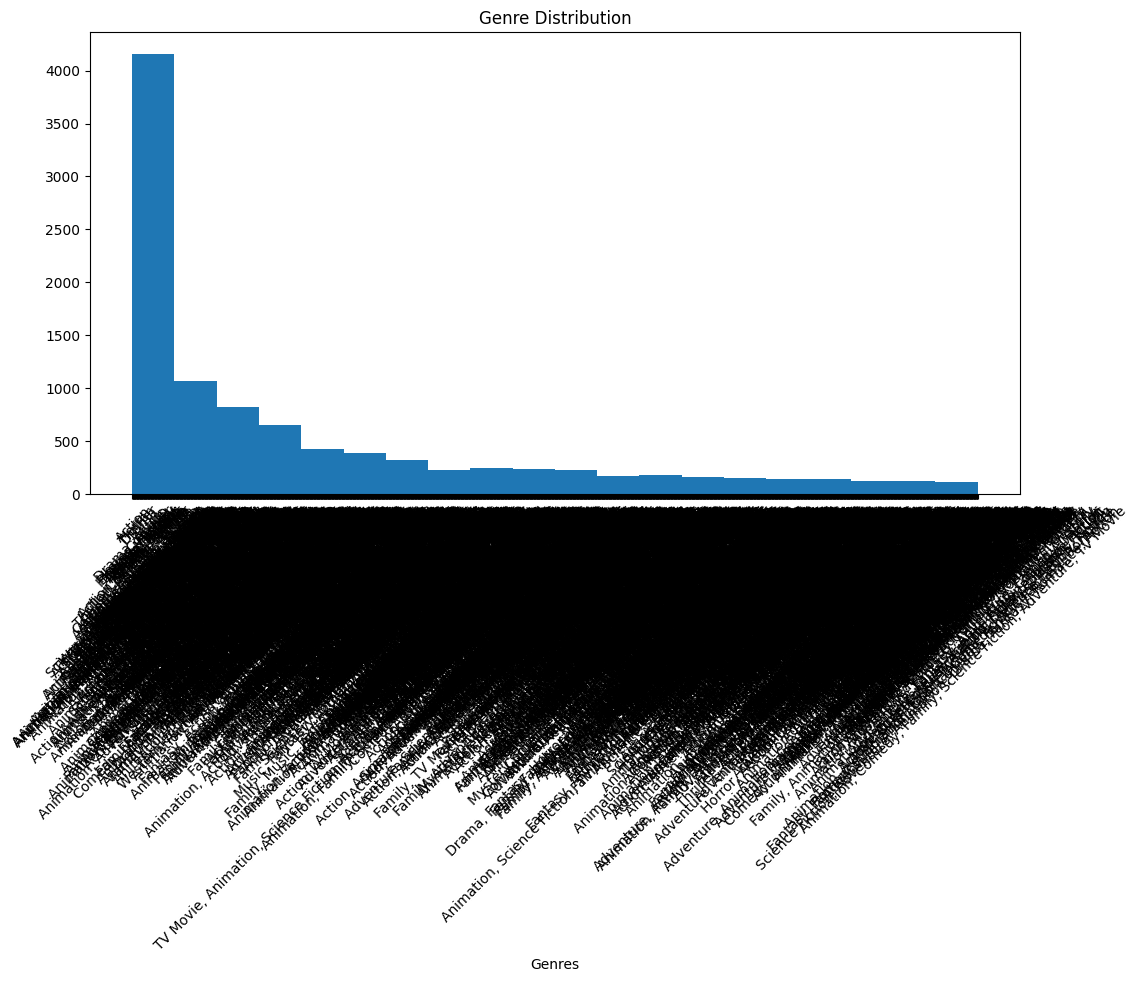

In [26]:
plt.figure(figsize=(12,6))
plt.hist(data['genre'], bins=20)
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.xticks(rotation=45)
plt.show()

Converting the columns from 'object' Dtype to 'categorical'

In [38]:
categorical_columns = ['names','date_x','overview','genre', 'status', 'orig_lang', 'country','orig_title']
for col in categorical_columns:
    data[col] = data[col].astype('category')

## Modelling

Train Test Split

In [39]:
X = data.drop('revenue', axis=1)
y = data['revenue']

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
train = xgb.DMatrix(xtrain, label=ytrain, enable_categorical=True)
test = xgb.DMatrix(xtest, label=ytest, enable_categorical=True)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'enable_categorical': True
}

evals = [(train, 'train'),(test, 'test')]
evals_result = {}

model = xgb.train(params, train, num_boost_round=100, evals=evals, evals_result=evals_result)

[0]	train-rmse:216575944.98110	test-rmse:242791884.33292


g:\Portfolio Projects\Data Science\4-Box Office Revenue Prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:43:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "enable_categorical" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	train-rmse:176002489.85234	test-rmse:219422121.97134
[2]	train-rmse:142862554.80965	test-rmse:205021873.59208
[3]	train-rmse:123687133.50338	test-rmse:199511307.34824
[4]	train-rmse:107693093.79722	test-rmse:193677489.36028
[5]	train-rmse:94115338.08629	test-rmse:189584604.68703
[6]	train-rmse:84778339.75125	test-rmse:189290119.26161
[7]	train-rmse:79539864.22051	test-rmse:189506549.95861
[8]	train-rmse:73521251.00494	test-rmse:188405180.44070
[9]	train-rmse:69404451.14260	test-rmse:188597071.60708
[10]	train-rmse:66489592.27576	test-rmse:188758590.94389
[11]	train-rmse:63900285.60838	test-rmse:188877321.01282
[12]	train-rmse:61580542.38529	test-rmse:189073302.16592
[13]	train-rmse:58434847.34368	test-rmse:188333719.88226
[14]	train-rmse:56403606.42547	test-rmse:188578897.20813
[15]	train-rmse:54252389.36281	test-rmse:188633076.35694
[16]	train-rmse:52423523.43712	test-rmse:187985078.45011
[17]	train-rmse:50667447.48819	test-rmse:187911268.14887
[18]	train-rmse:49054149.06806	test-

## Prediction

In [51]:
X

,names,date_x,score,genre,overview,orig_title,status,orig_lang,budget_x,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...",Creed III,Released,English,75000000.0,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,Avatar: The Way of Water,Released,English,460000000.0,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...",The Super Mario Bros. Movie,Released,English,100000000.0,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...",Momias,Released,"Spanish, Castilian",12300000.0,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,Supercell,Released,English,77000000.0,US
...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...",20th Century Women,Released,English,7000000.0,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,Delta Force 2: The Colombian Connection,Released,English,9145817.8,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...",The Russia House,Released,English,21800000.0,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,Darkman II: The Return of Durant,Released,English,116000000.0,US


In [50]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(['Chote Miyan Bade Miyan',''])

rmse = mean_squared_error(ytest, y_pred, squared=False)
print(f"RMSE: {rmse}")

#print(f"Accuracy : {accuracy_score(ytest, y_pred)}")
#print(f"Precision : {precision_score(ytest, y_pred)}")
#print(f"Recall : {recall_score(ytest, y_pred)}")
#print(f"F1 Score : {f1_score(ytest, y_pred)}")

RMSE: 188613345.9356098


g:\Portfolio Projects\Data Science\4-Box Office Revenue Prediction\env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
